In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.load('/home/ML4NO/Data/n1000000_0910_classification.npz')
features = data.files

In [3]:
features = ['ve_dune', 'vu_dune', 'vebar_dune', 'vubar_dune', 've_t2hk', 'vu_t2hk', 'vebar_t2hk', 
            'vubar_t2hk', 'theta12', 'theta13', 'theta23', 'delta', 'sdm', 'ldm', 'octant', 'cpv', 'mo']
classes = ['theta12', 'theta13', 'theta23', 'delta', 'sdm', 'ldm']
units = ['degree', 'degree', 'degree', 'degree', 'eV^2', 'eV^2']
data_all = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune']])

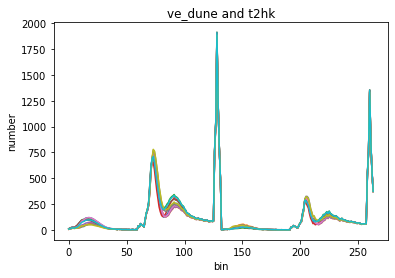

In [4]:
for i in range(10):
    plt.plot(data_all[i, :])
plt.xlabel('bin')
plt.ylabel('number')
plt.title('ve_dune and t2hk')
plt.savefig('spectrum.png')
plt.show()

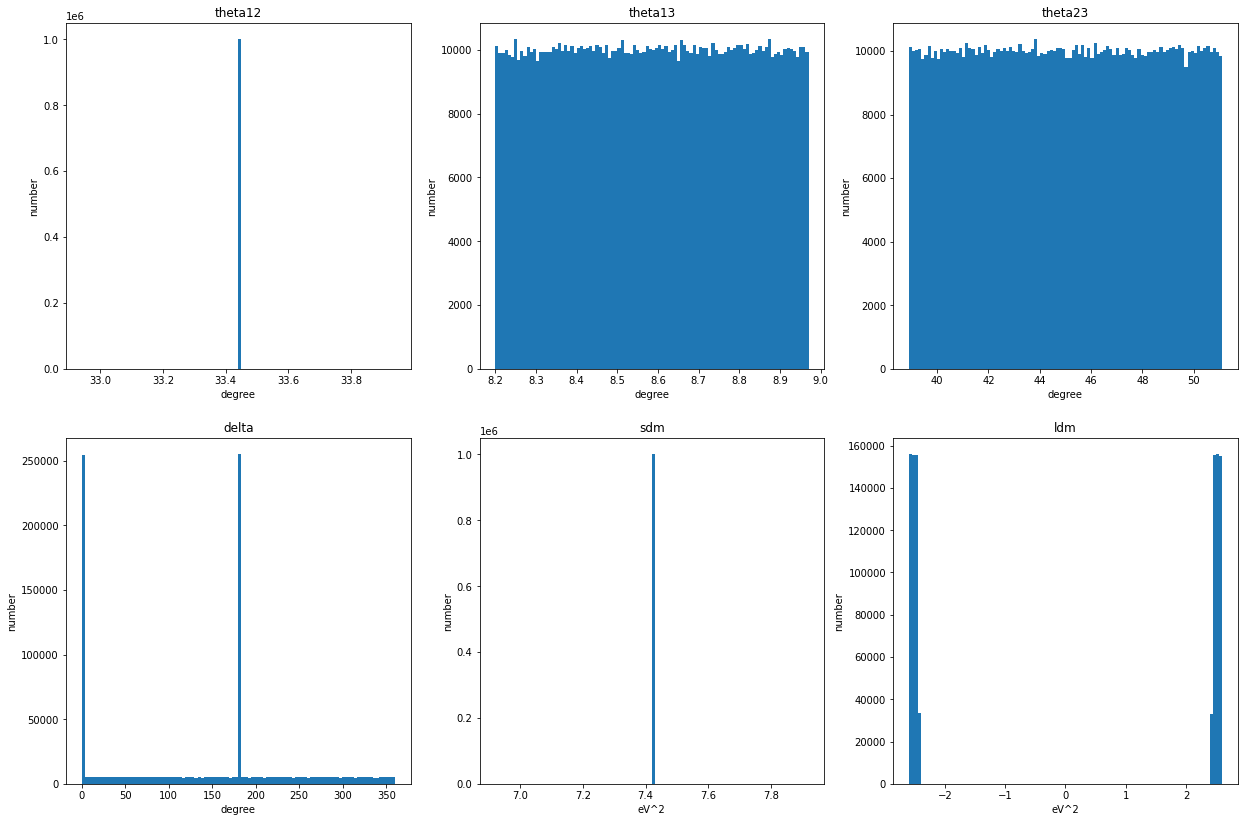

In [5]:
fig = plt.figure(figsize=(21,14))
axs = fig.subplots(2, 3)

for i, c in enumerate(classes):
    axs[i//3][i%3].hist(data[c], bins = 100)
    axs[i//3][i%3].title.set_text(c)
    axs[i//3][i%3].set_xlabel(units[i])
    axs[i//3][i%3].set_ylabel('number')
    
plt.savefig('parameterDistribution.png')
plt.show()

In [5]:
data_max = data_all.max(axis = 0)
data_min = data_all.min(axis = 0)

plt.figure(figsize=(15, 9))
plt.plot(data_max, label = 'max')
plt.plot(data_min, label = 'min')
plt.xlabel('bin')
plt.ylabel('number')
plt.ylim(0, 100)
plt.legend()
plt.title('data range')
plt.show()

In [7]:
corr_data = pd.DataFrame(data['ve_dune'])
corr_M = corr_data.corr()

Text(0.5, 1.0, 've_dune 50bins correlation matrix')

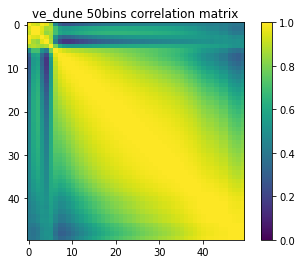

In [8]:
plt.imshow(corr_M)
plt.colorbar()
plt.clim(0, 1)
plt.title('ve_dune 50bins correlation matrix')